In [45]:
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings

# NOTE: I am ignoring the deprecation warnings on lmafit because I haven't found a way around them yet
warnings.filterwarnings("ignore")

cwd = os.getcwd()
par = os.path.join(cwd, os.pardir)
sys.path.append(par)

# I made some modules to make importing easier and to have a nice class
# that does all the matrix operations
import matrix_operation
import Dataset

In [46]:
# Just to reload the modules I imported above so I dont need to restart the kernel after making changes
import importlib
importlib.reload(matrix_operation)
importlib.reload(Dataset)

from matrix_operation import mat_opr
from Dataset import dataset

### Import and combine NYT and Big10

In [47]:
# hopefully this works on with your directory structure
# dset.nyt_df : NYT data
# dset.big10_df : Big10 data
# dset.combined and dset.dataframe are the combined version
dset = dataset()

# drop all zero rows and columns
dset.drop_zero_rows()
dset.drop_zero_cols()

# drop all rows where Big10 isn't complete
dset = dset.drop_bad_rows()

### Compare Input with NMF approximation

In [48]:
ranker = dset.rank_approx()
print(ranker)

1


In [49]:
ranker = 5

In [50]:
inp = dset.dataframe

nmfed = dset.nmf(ranker, 'nndsvd')

### Graph Results

<AxesSubplot:title={'center':'Ohio State'}>

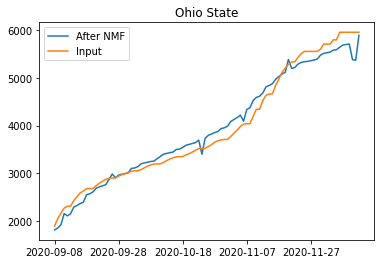

In [51]:
Ohio = pd.concat([inp['Ohio State'], nmfed.dataframe['Ohio State']], axis = 1)
Ohio.columns = ['Input', 'After NMF']
Ohio = Ohio.replace(0,np.nan)

Ohio.drop('Input',1).plot(kind = 'line',legend=True, title = 'Ohio State')
Ohio['Input'].plot(legend=True)

<AxesSubplot:title={'center':'Boston University'}>

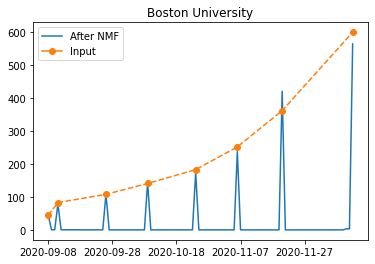

In [52]:
bu = pd.concat([inp['Boston University'], nmfed.dataframe['Boston University']], axis = 1)
bu.columns = ['Input','After NMF']
bu = bu.replace(0,np.nan)

bu.drop('Input',1).plot(kind = 'line',legend=True, title = 'Boston University')
bu['Input'].plot(marker='o',legend=True)
bu['Input'].interpolate(method='linear').plot(color = 'tab:orange', linestyle='--')

### Take a look at the basis vectors

In [53]:
def plot_bases(data_obj, ranky):
    w,h = data_obj.nmf(ranky, 'random', True)
    bases = pd.DataFrame(w)
    
    for i in bases.columns:
        bases[i].plot()
        plt.show()

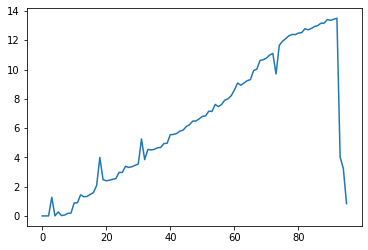

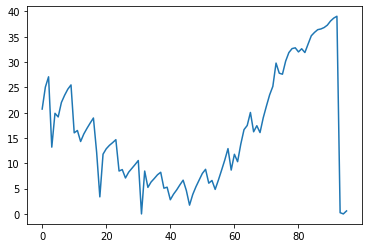

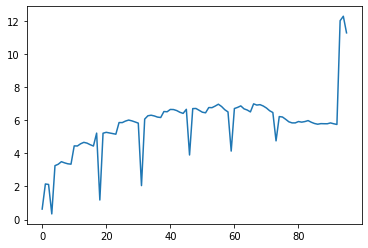

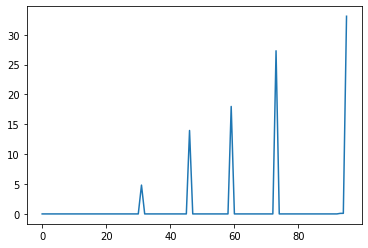

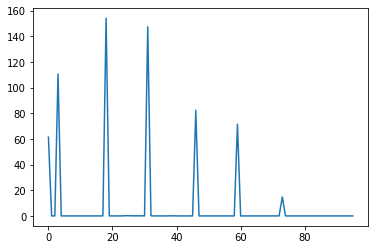

In [54]:
plot_bases(dset,ranker)

### Interpolate using Isotonic first?

In [55]:
with_iso = dset.iso(unk=0)

In [56]:
iso_nmf = with_iso.nmf(ranker, 'random')

<AxesSubplot:title={'center':'Boston University'}>

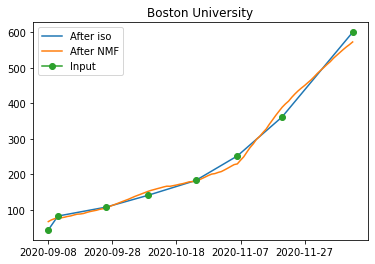

In [57]:
bu = pd.concat([inp['Boston University'],with_iso.dataframe['Boston University'], iso_nmf.dataframe['Boston University']], axis = 1)
bu.columns = ['Input','After iso','After NMF']

bu.drop('Input',1).plot(kind = 'line',legend=True, title = 'Boston University')

bu['Input'] = bu['Input'].replace(0,np.nan)
bu['Input'].plot(marker='o',legend=True)

### Look at the basis vectors again

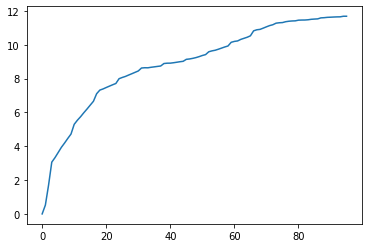

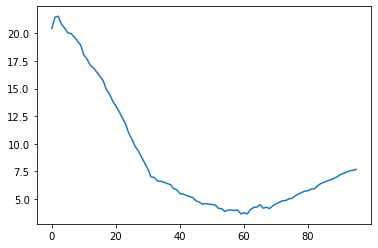

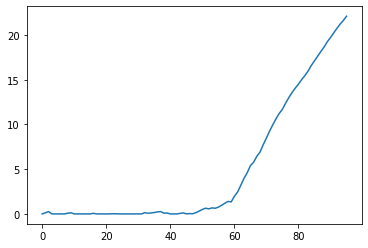

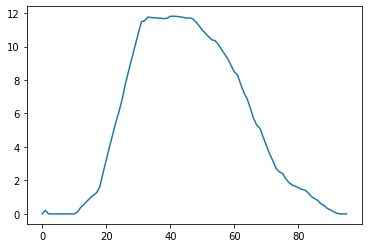

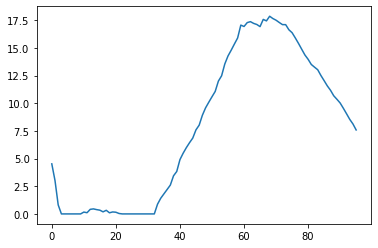

In [58]:
plot_bases(with_iso, ranker)

### How to interpret these curves? -- Maybe infection rate or new cases per day?

<AxesSubplot:>

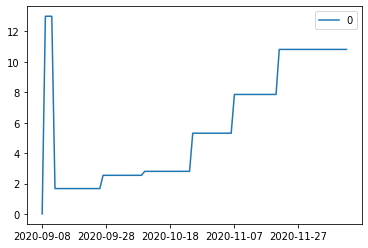

In [59]:
# 'University of California, Los Angeles'
bosu = with_iso.dataframe['Boston University']

new_cases = []
for i in range(len(bosu)):
    if i == 0:
        new_cases.append(0)
    else:
        diff = bosu.iloc[i] - bosu.iloc[i-1]
        new_cases.append(diff)
        
change = pd.DataFrame(data= new_cases, index = bosu.index)
change.plot()
    

In [60]:
locr = with_iso.dataframe.columns.get_loc('Boston University')
x,y = with_iso.nmf(ranker, 'random', True)

In [61]:
print(pd.DataFrame(y).iloc[:,locr])

0     8.173743
1     2.489861
2    19.486161
3     5.587716
4     3.640117
Name: 969, dtype: float64
